# Custom OCR - training the neural network



# Importing the libraries

In [2]:
import tensorflow
tensorflow.__version__
# pip install nvidia-tensorflow[horovod] --extra-index-url=https://pypi.ngc.nvidia.com/

'2.17.0'

In [3]:
import numpy as np
import zipfile
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Loading the datasets

## MNIST 0-9

In [4]:
from tensorflow.keras.datasets import mnist

In [5]:
(train_data, train_labels), (test_data, test_labels) = mnist.load_data()

In [6]:
train_data.shape, test_data.shape

((60000, 28, 28), (10000, 28, 28))

In [7]:
28 * 28

784

In [8]:
train_labels.shape, test_labels.shape

((60000,), (10000,))

In [9]:
train_data[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [10]:
train_data[0].shape

(28, 28)

In [11]:
train_labels[0]

5

In [12]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [13]:
digits_data = np.vstack([train_data, test_data])
digits_labels = np.hstack([train_labels, test_labels])

In [14]:
digits_data.shape

(70000, 28, 28)

In [15]:
digits_labels.shape

(70000,)

In [16]:
np.random.randint(0, digits_data.shape[0])

4121

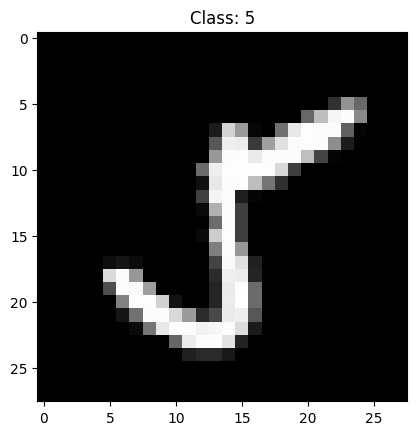

In [17]:
index = np.random.randint(0, digits_data.shape[0])
plt.imshow(digits_data[index], cmap='gray')
plt.title('Class: ' + str(digits_labels[index]));

<Axes: ylabel='count'>

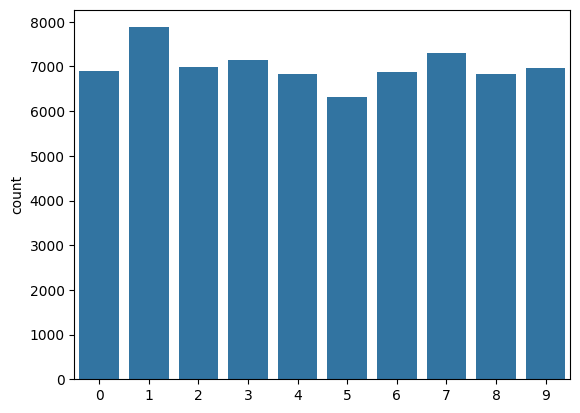

In [18]:
# sns.countplot(digits_labels);
sns.countplot(x=digits_labels)

## Kaggle A-Z

In [19]:
# !wget https://iaexpert.academy/arquivos/alfabeto_A-Z.zip

In [20]:
# zip_object = zipfile.ZipFile(file = 'alfabeto_A-Z.zip', mode = 'r')
# zip_object.extractall('./')
# zip_object.close()

In [21]:
dataset_az = pd.read_csv('A_Z Handwritten Data.csv').astype('float32')
dataset_az

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372445,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
372446,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
372447,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
372448,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
alphabet_data = dataset_az.drop('0', axis = 1)
alphabet_labels = dataset_az['0']

In [23]:
alphabet_data.shape, alphabet_labels.shape

((372450, 784), (372450,))

In [24]:
alphabet_labels

0          0.0
1          0.0
2          0.0
3          0.0
4          0.0
          ... 
372445    25.0
372446    25.0
372447    25.0
372448    25.0
372449    25.0
Name: 0, Length: 372450, dtype: float32

In [25]:
alphabet_data = np.reshape(alphabet_data.values, (alphabet_data.shape[0], 28, 28))

In [26]:
alphabet_data.shape

(372450, 28, 28)

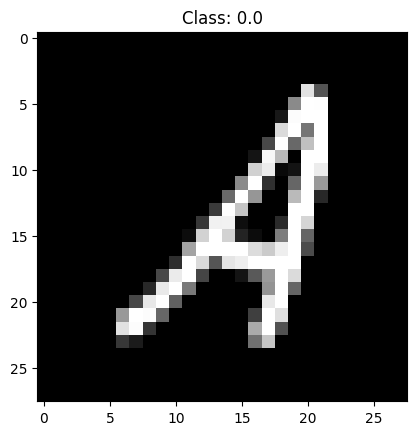

In [27]:
index = np.random.randint(0, alphabet_data.shape[0])
plt.imshow(alphabet_data[index], cmap = 'gray')
plt.title('Class: ' + str(alphabet_labels[index]));

<Axes: xlabel='0', ylabel='count'>

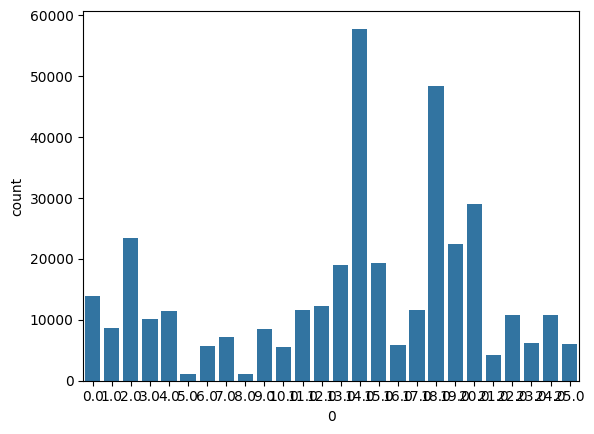

In [28]:
# sns.countplot(alphabet_labels);
sns.countplot(x=alphabet_labels)

## Joining the datasets

In [29]:
digits_labels, np.unique(digits_labels)

(array([5, 0, 4, ..., 4, 5, 6], dtype=uint8),
 array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8))

In [30]:
alphabet_labels, np.unique(alphabet_labels)

(0          0.0
 1          0.0
 2          0.0
 3          0.0
 4          0.0
           ... 
 372445    25.0
 372446    25.0
 372447    25.0
 372448    25.0
 372449    25.0
 Name: 0, Length: 372450, dtype: float32,
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.],
       dtype=float32))

In [31]:
alphabet_labels += 10

In [32]:
alphabet_labels, np.unique(alphabet_labels)

(0         10.0
 1         10.0
 2         10.0
 3         10.0
 4         10.0
           ... 
 372445    35.0
 372446    35.0
 372447    35.0
 372448    35.0
 372449    35.0
 Name: 0, Length: 372450, dtype: float32,
 array([10., 11., 12., 13., 14., 15., 16., 17., 18., 19., 20., 21., 22.,
        23., 24., 25., 26., 27., 28., 29., 30., 31., 32., 33., 34., 35.],
       dtype=float32))

In [33]:
data = np.vstack([alphabet_data, digits_data])
labels = np.hstack([alphabet_labels, digits_labels])

In [34]:
data.shape, labels.shape

((442450, 28, 28), (442450,))

In [35]:
np.unique(labels)

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26., 27., 28., 29., 30., 31., 32., 33., 34., 35.], dtype=float32)

In [36]:
data = np.array(data, dtype = 'float32')

In [37]:
data = np.expand_dims(data, axis = -1)

In [38]:
data.shape

(442450, 28, 28, 1)

# Pre-processing the data

In [39]:
data[0].min(), data[0].max()

(0.0, 255.0)

In [40]:
data /= 255.0

In [41]:
data[0].min(), data[0].max()

(0.0, 1.0)

In [42]:
np.unique(labels), len(np.unique(labels)) # softmax

(array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
        26., 27., 28., 29., 30., 31., 32., 33., 34., 35.], dtype=float32),
 36)

In [43]:
le = LabelBinarizer()
labels = le.fit_transform(labels)

In [44]:
np.unique(labels)

array([0, 1])

In [45]:
labels

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [46]:
labels[0], len(labels[0])

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 36)

In [47]:
labels[30000]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [48]:
# OneHotEncoder
# A, B, C
# 0, 1, 2

# A, B, C
# 1, 0, 0
# 0, 1, 0
# 0, 0, 1

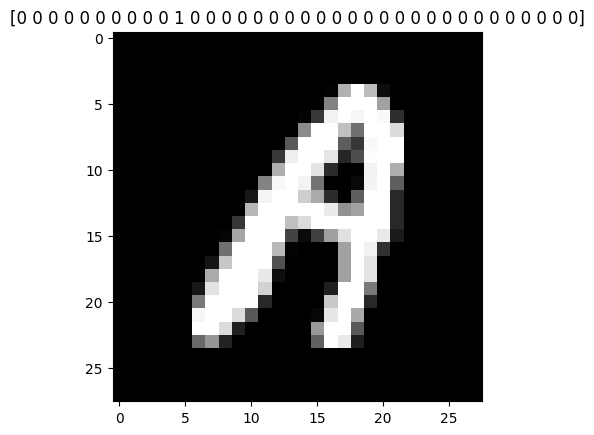

In [49]:
plt.imshow(data[0].reshape(28,28), cmap='gray')
plt.title(str(labels[0]));

In [50]:
classes_total = labels.sum(axis = 0)
classes_total

array([ 6903,  7877,  6990,  7141,  6824,  6313,  6876,  7293,  6825,
        6958, 13869,  8668, 23409, 10134, 11440,  1163,  5762,  7218,
        1120,  8493,  5603, 11586, 12336, 19010, 57825, 19341,  5812,
       11566, 48419, 22495, 29008,  4182, 10784,  6272, 10859,  6076])

In [51]:
classes_total.max()

57825

In [52]:
57825 / 6903

8.376792698826597

In [53]:
classes_weights = {}
for i in range(0, len(classes_total)):
  #print(i)
  classes_weights[i] = classes_total.max() / classes_total[i]

In [54]:
classes_weights

{0: 8.376792698826597,
 1: 7.340992763742541,
 2: 8.272532188841202,
 3: 8.097605377398123,
 4: 8.473769050410317,
 5: 9.15967052114684,
 6: 8.409685863874346,
 7: 7.928835870012341,
 8: 8.472527472527473,
 9: 8.310577752227651,
 10: 4.169370538611291,
 11: 6.671089063221043,
 12: 2.4702037677816224,
 13: 5.7060390763765545,
 14: 5.0546328671328675,
 15: 49.72055030094583,
 16: 10.035577924331829,
 17: 8.011221945137157,
 18: 51.629464285714285,
 19: 6.808548216178029,
 20: 10.320364090665715,
 21: 4.990937338166753,
 22: 4.6875,
 23: 3.0418200946870066,
 24: 1.0,
 25: 2.989762680316426,
 26: 9.94924294562973,
 27: 4.999567698426422,
 28: 1.1942625828703608,
 29: 2.5705712380529007,
 30: 1.993415609487038,
 31: 13.827116212338593,
 32: 5.362110534124629,
 33: 9.21954719387755,
 34: 5.3250759738465785,
 35: 9.51695194206715}

In [55]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size = 0.2, random_state = 1, stratify = labels)

In [56]:
X_train.shape, X_test.shape

((353960, 28, 28, 1), (88490, 28, 28, 1))

In [57]:
y_train.shape, y_test.shape

((353960, 36), (88490, 36))

In [58]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [59]:
augmentation = ImageDataGenerator(rotation_range = 10, zoom_range=0.05, width_shift_range=0.1,
                                  height_shift_range=0.1, horizontal_flip = False)

# Buiding the neural network

- Padding: https://www.pico.net/kb/what-is-the-difference-between-same-and-valid-padding-in-tf-nn-max-pool-of-tensorflow

In [60]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from tensorflow.keras.callbacks import ModelCheckpoint

In [61]:
from keras.models import Sequential
from keras.layers import Input, Conv2D, MaxPool2D, Flatten, Dense

network = Sequential()

# 1. Start with an explicit Input object
network.add(Input(shape=(28, 28, 1)))

# 2. Add your layers without the input_shape argument
network.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
network.add(MaxPool2D(pool_size=(2,2)))

network.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'))
network.add(MaxPool2D(pool_size=(2,2)))

network.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu', padding='same')) #or 'valid"
network.add(MaxPool2D(pool_size=(2,2)))

network.add(Flatten())

network.add(Dense(64, activation='relu'))
network.add(Dense(128, activation='relu'))
network.add(Dense(36, activation='softmax'))

network.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


I0000 00:00:1768355542.024630   42781 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1768355542.065054   42781 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1768355542.069659   42781 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1768355542.075112   42781 cuda_executor.cc:1015] successful NUMA node read from SysFS ha

In [62]:
3 * 3 * 128

1152

In [63]:
network.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 6, 6, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 36)             │         4,644 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 179,428 (700.89 KB)

 Trainable params: 179,428 (700.89 KB)

 Non-trainable params: 0 (0.00 B)

In [64]:
name_labels = '0123456789'
name_labels += 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'
name_labels = [l for l in name_labels]

In [65]:
print(name_labels)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']


# Training the neural network

In [66]:
file_model = 'custom_ocr.keras'
epochs = 30
batch_size = 64

In [67]:
checkpointer = ModelCheckpoint(file_model, monitor = 'val_loss', verbose = 1, save_best_only=True)

In [68]:
len(X_train) // batch_size

5530

In [69]:
# history = network.fit(augmentation.flow(X_train, y_train, batch_size=batch_size),
#                       validation_data = (X_test, y_test),
#                       steps_per_epoch = len(X_train) // batch_size, epochs=epochs,
#                       class_weight = classes_weights, verbose=1, callbacks=[checkpointer])


history = network.fit(
    augmentation.flow(X_train, y_train, batch_size=batch_size),
    validation_data=(X_test, y_test),
    # Remove steps_per_epoch and let Keras handle it
    epochs=epochs,
    class_weight=classes_weights,
    verbose=1,
    callbacks=[checkpointer]
)

Epoch 1/30


I0000 00:00:1768355546.999167   43567 service.cc:146] XLA service 0xfd906400b1d0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1768355546.999196   43567 service.cc:154]   StreamExecutor device (0): NVIDIA GB10, Compute Capability 12.1
2026-01-14 01:52:27.031782: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2026-01-14 01:52:27.146529: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 91701
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this ta

  43/5531 ━━━━━━━━━━━━━━━━━━━━ 20s 4ms/step - accuracy: 0.0238 - loss: 17.1773

I0000 00:00:1768355549.689809   43567 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1231/5531 ━━━━━━━━━━━━━━━━━━━━ 17s 4ms/step - accuracy: 0.5423 - loss: 7.1368

'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring f

5529/5531 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7456 - loss: 3.5288

'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring f


Epoch 1: val_loss improved from None to 0.31876, saving model to custom_ocr.keras

Epoch 1: finished saving model to custom_ocr.keras
5531/5531 ━━━━━━━━━━━━━━━━━━━━ 33s 5ms/step - accuracy: 0.8432 - loss: 1.8685 - val_accuracy: 0.8638 - val_loss: 0.3188
Epoch 2/30
5529/5531 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9040 - loss: 0.9301
Epoch 2: val_loss improved from 0.31876 to 0.20044, saving model to custom_ocr.keras

Epoch 2: finished saving model to custom_ocr.keras
5531/5531 ━━━━━━━━━━━━━━━━━━━━ 27s 5ms/step - accuracy: 0.9071 - loss: 0.9016 - val_accuracy: 0.9325 - val_loss: 0.2004
Epoch 3/30
5521/5531 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9154 - loss: 0.7912
Epoch 3: val_loss did not improve from 0.20044
5531/5531 ━━━━━━━━━━━━━━━━━━━━ 29s 5ms/step - accuracy: 0.9173 - loss: 0.7719 - val_accuracy: 0.9189 - val_loss: 0.2085
Epoch 4/30
5531/5531 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9242 - loss: 0.6935
Epoch 4: val_loss did not improve from 0.20044
5531/5531 

# Evaluating the neural network

In [70]:
X_test.shape

(88490, 28, 28, 1)

In [71]:
predictions = network.predict(X_test, batch_size=batch_size)

  91/1383 ━━━━━━━━━━━━━━━━━━━━ 0s 565us/step  

'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)


1304/1383 ━━━━━━━━━━━━━━━━━━━━ 0s 618us/step

'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring f

1383/1383 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)


In [72]:
predictions

array([[6.3650638e-01, 5.2750413e-05, 4.0514788e-04, ..., 1.4191447e-11,
        2.2414415e-04, 1.4674569e-06],
       [3.1766196e-33, 2.1903603e-14, 1.1816096e-12, ..., 1.3220252e-09,
        4.5482938e-14, 2.0181155e-07],
       [1.5961132e-24, 1.4968060e-21, 2.1810178e-19, ..., 7.3544712e-12,
        2.6344218e-10, 8.2464064e-28],
       ...,
       [4.0787068e-01, 4.6182058e-10, 1.8530203e-07, ..., 9.5536769e-20,
        3.1503629e-07, 1.3195680e-12],
       [7.7328885e-28, 1.0567697e-07, 5.6011021e-07, ..., 9.9978524e-01,
        1.4056926e-04, 8.7564624e-13],
       [2.4125999e-08, 1.0105517e-19, 1.2808060e-07, ..., 6.7890907e-39,
        9.6801861e-22, 1.5772222e-09]], dtype=float32)

In [73]:
predictions[0]

array([6.3650638e-01, 5.2750413e-05, 4.0514788e-04, 1.2334019e-06,
       1.2207402e-06, 3.5974375e-05, 1.5944961e-04, 6.0431375e-05,
       1.1493260e-04, 1.0629168e-03, 4.3495049e-05, 1.1882004e-04,
       1.5778867e-04, 2.0509673e-02, 2.8734426e-06, 6.6604109e-12,
       2.7279861e-05, 6.2831602e-09, 7.8234691e-10, 1.4279142e-04,
       1.2283513e-09, 1.7185980e-06, 1.2196493e-05, 3.2759289e-04,
       3.3747286e-01, 1.3686729e-03, 4.3030197e-04, 7.8600542e-06,
       6.3859363e-05, 7.1982417e-05, 6.1369711e-04, 1.6165749e-10,
       4.5283326e-07, 1.4191447e-11, 2.2414415e-04, 1.4674569e-06],
      dtype=float32)

In [74]:
len(predictions[0])

36

In [75]:
np.argmax(predictions[0])

0

In [76]:
name_labels[24]

'O'

In [77]:
y_test[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [78]:
np.argmax(y_test[0])

24

In [79]:
name_labels[np.argmax(y_test[0])]

'O'

In [80]:
network.evaluate(X_test, y_test)

2766/2766 ━━━━━━━━━━━━━━━━━━━━ 2s 682us/step - accuracy: 0.9502 - loss: 0.1467


[0.14671729505062103, 0.9501977562904358]

In [81]:
print(classification_report(y_test.argmax(axis=1), predictions.argmax(axis=1), target_names = name_labels))

              precision    recall  f1-score   support

           0       0.32      0.64      0.43      1381
           1       0.97      0.99      0.98      1575
           2       0.93      0.94      0.94      1398
           3       0.98      0.98      0.98      1428
           4       0.94      0.93      0.94      1365
           5       0.83      0.89      0.86      1263
           6       0.96      0.98      0.97      1375
           7       0.94      0.99      0.97      1459
           8       0.95      0.98      0.96      1365
           9       0.91      0.99      0.95      1392
           A       0.99      0.99      0.99      2774
           B       0.99      0.97      0.98      1734
           C       0.99      0.99      0.99      4682
           D       0.91      0.96      0.93      2027
           E       0.99      0.98      0.99      2288
           F       0.94      1.00      0.97       233
           G       0.95      0.95      0.95      1152
           H       0.97    

In [82]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

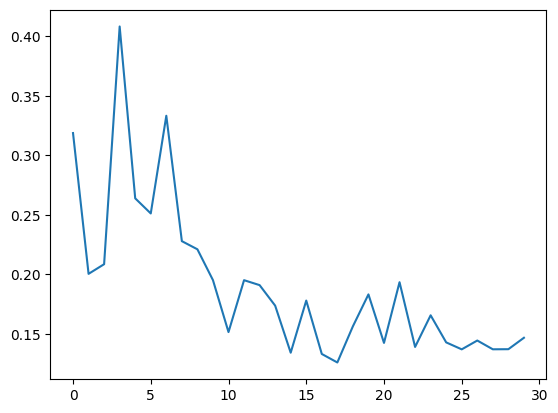

In [83]:
plt.plot(history.history['val_loss']);

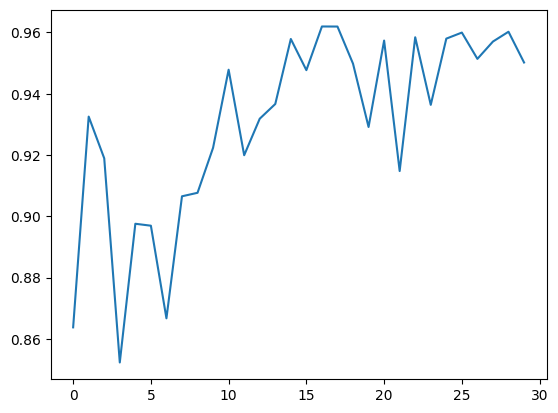

In [84]:
plt.plot(history.history['val_accuracy']);

# Saving the neural network on Google Drive

In [85]:
network.save('network.keras')

# Testing the neural network with images

In [86]:
from tensorflow.keras.models import load_model

In [87]:

loaded_network = load_model('network.keras', compile=False)

In [88]:
loaded_network

<Sequential name=sequential, built=True>

In [89]:
loaded_network.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 6, 6, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 36)             │         4,644 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 179,428 (700.89 KB)

 Trainable params: 179,428 (700.89 KB)

 Non-trainable params: 0 (0.00 B)

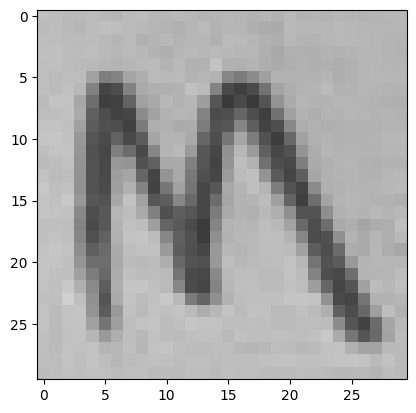

In [90]:
import cv2
img = cv2.imread('Images/letter-m.jpg')
plt.imshow(img)

In [91]:
img.shape

(30, 30, 3)

In [92]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(30, 30)

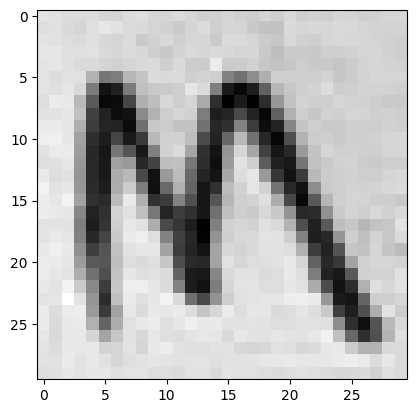

In [93]:
plt.imshow(gray, cmap="gray")

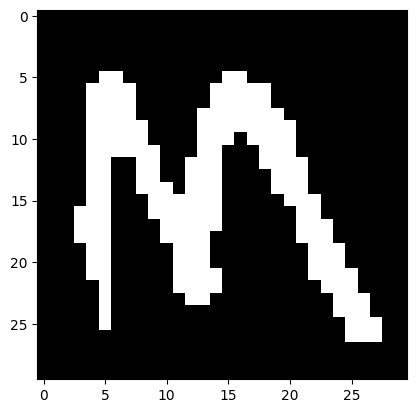

In [94]:
value, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)
plt.imshow(thresh, cmap='gray')

In [95]:
value

137.0

In [96]:
thresh.shape

(30, 30)

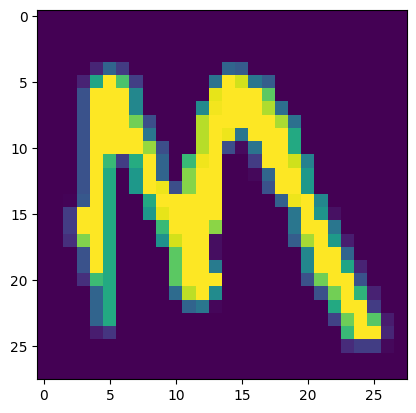

In [97]:
img = cv2.resize(thresh, (28,28))
plt.imshow(img)

In [98]:
img.shape

(28, 28)

In [99]:
img = img.astype('float32') / 255.0
img = np.expand_dims(img, axis = -1)
img.shape

(28, 28, 1)

In [100]:
img = np.reshape(img, (1,28,28,1))
img.shape

(1, 28, 28, 1)

In [101]:
prediction = loaded_network.predict(img)
prediction

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)


array([[3.74670413e-15, 9.94710716e-13, 1.05981067e-14, 3.24610953e-19,
        5.01072898e-11, 5.00149238e-16, 2.00071895e-17, 5.31730393e-08,
        1.18537925e-22, 6.72023938e-12, 1.77759816e-08, 1.63219224e-13,
        1.45215812e-10, 3.92543188e-05, 4.96827472e-15, 1.52376553e-29,
        4.65627883e-12, 1.20208381e-06, 5.52009107e-19, 5.32766331e-10,
        1.23077575e-08, 3.52835209e-12, 9.99053895e-01, 9.04432847e-04,
        4.90708629e-08, 2.47360683e-15, 2.01304116e-13, 2.69405520e-09,
        3.64350655e-07, 1.71598991e-09, 5.62806576e-07, 4.20990140e-21,
        1.64165897e-07, 3.59866026e-10, 8.64850483e-11, 3.25982615e-16]],
      dtype=float32)

In [102]:
np.argmax(prediction)

22

In [103]:
name_labels[np.argmax(prediction)]

'M'